## **Employee Attrition Prediction Using Machine Learning Decision Trees**
Employee attrition refers to a gradual but deliberate reduction in staff numbers that occurs as employees leave a company and are not replaced.There are a number of reasons why employee attrition takes place and these include
unsatisfactory pay and/or benefits, lack of opportunity,poor workplace conditions, poor work-life balance among others.
This can lead to to increased costs for hiring and training of new employees for the company, as well as disruptions to productivity and team dynamics.
To ovecome this challenge we shall develop a model that can predict which employees are at a higher risk of leaving, which conditions could explain this risk, and what could be done to avoid their potential exit.


**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [2]:
#Importing the dataset and reading the first 2 rows
data = pd.read_csv("employee_attrition_dataset.csv")
#Display first 5 rows of dataset
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#checking rows and columns of data
data.shape

(1470, 35)

Initially the daset has 1470 rows and 35 columns

In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Features Types**

**Categorical**
- Nominal - Attrition, BusinessTravel, Department, EducationField, Gender,JobRole, MaritalStatus, OverTime

- Ordinal - Education, EnvironmentSatisfaction, JobInvolvement, JobLevel,JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance
    
**Numerical**
           
  Age, DailyRate, DistanceFromHome, HourlyRate, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears,TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole,YearsSinceLastPromotion, YearsWithCurrManager

In [5]:
#Description of object datatype variables
data.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [6]:
#Key statistics for numerical columns
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From the key statistics we discover that
1. EmployeeCount: This column has 1s throughout which indicate every observation is linked with 1 employee only hence we shall drop it.
2. StandardHours: This column has 80s throughtout which means everyone in this dataset works as a fulltime employee so we shall aslo drop this column.
3. Over18: This column infroms us that every employee in this dataset is over 18 and we shall also drop this column
4.EmployeeNumber: This is a unique number representing a certain employee and we shall drop it as its concidered redundant information.

In [7]:
#Dropping the redundant columns
data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber',],inplace=True)
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7


In [8]:
#Checking data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [9]:
#Checking for null values
null_values = data.isnull().sum()
null_values.sum()


0

There are no null values observed

In [10]:
#check for duplicates
data.duplicated().value_counts()
data.drop_duplicates(inplace=True)
len(data)

1470

There no duplicates found

**Exploratory Data Analysis**

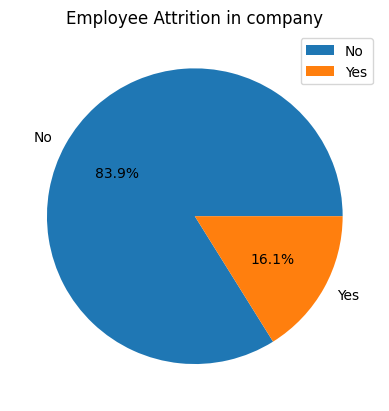

In [11]:
#Checking the distribution of the target variable using a pie chart
L = data['Attrition'].value_counts()
plt.pie(L, labels= L.index, autopct = '%1.1f%%')
plt.title('Employee Attrition in company')
plt.legend(labels=L.index, loc='upper right')
plt.show()

The distribution of the target variable appears to be imbalanced. 83.9% of the employees decide to stay and 16.1% employees leave.

**Frequency Analysis of Numerical Data**

In [12]:
#Creating a numerical list
numerical_list = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                  'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

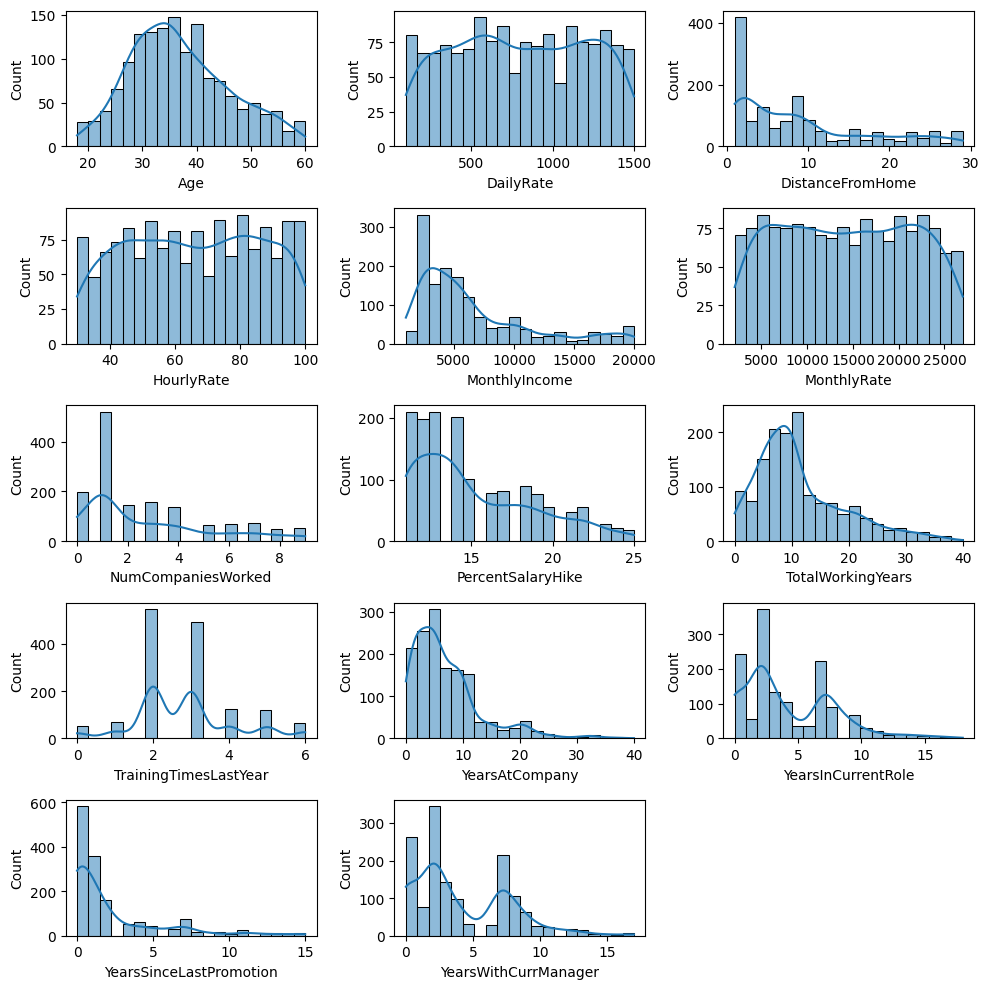

In [13]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_list, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[column], bins=20, kde = True)
plt.tight_layout()
plt.show()

##Observations
1. Age: The age feature is normally dsitributed and we can see that most people lie in the age bracket of 30-40 years

2. DailyRate, HourlyRate, MonthlyRate: Here the data is uniformly distributed and  we can see that  it's very consistent that is the frequency of each class is very similar to that of the others.

3. DistanceFromHome: From here, we can notice that most people stay at a short distance from the workplace

4. MonthlyIncome: we can notice that most people earn less than 5000

5. Trainingtimeslastyear: This plot can also show that there where 2-3 tainings last year

6. Numofcompaniesworked: This plot shows that most employees have worked for one company

7. TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager : All these plots a re right skewed and we can also notice that people stay in the company for a short time in all.


**Analysis of Ratings Features**

In [14]:
#Creating new dataframe called ratings with the features below
ratings = data[['EnvironmentSatisfaction','JobSatisfaction','PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance','JobInvolvement' ]].copy()

In [15]:
#checking categories in each feature
ratings.nunique()

EnvironmentSatisfaction     4
JobSatisfaction             4
PerformanceRating           2
RelationshipSatisfaction    4
WorkLifeBalance             4
JobInvolvement              4
dtype: int64

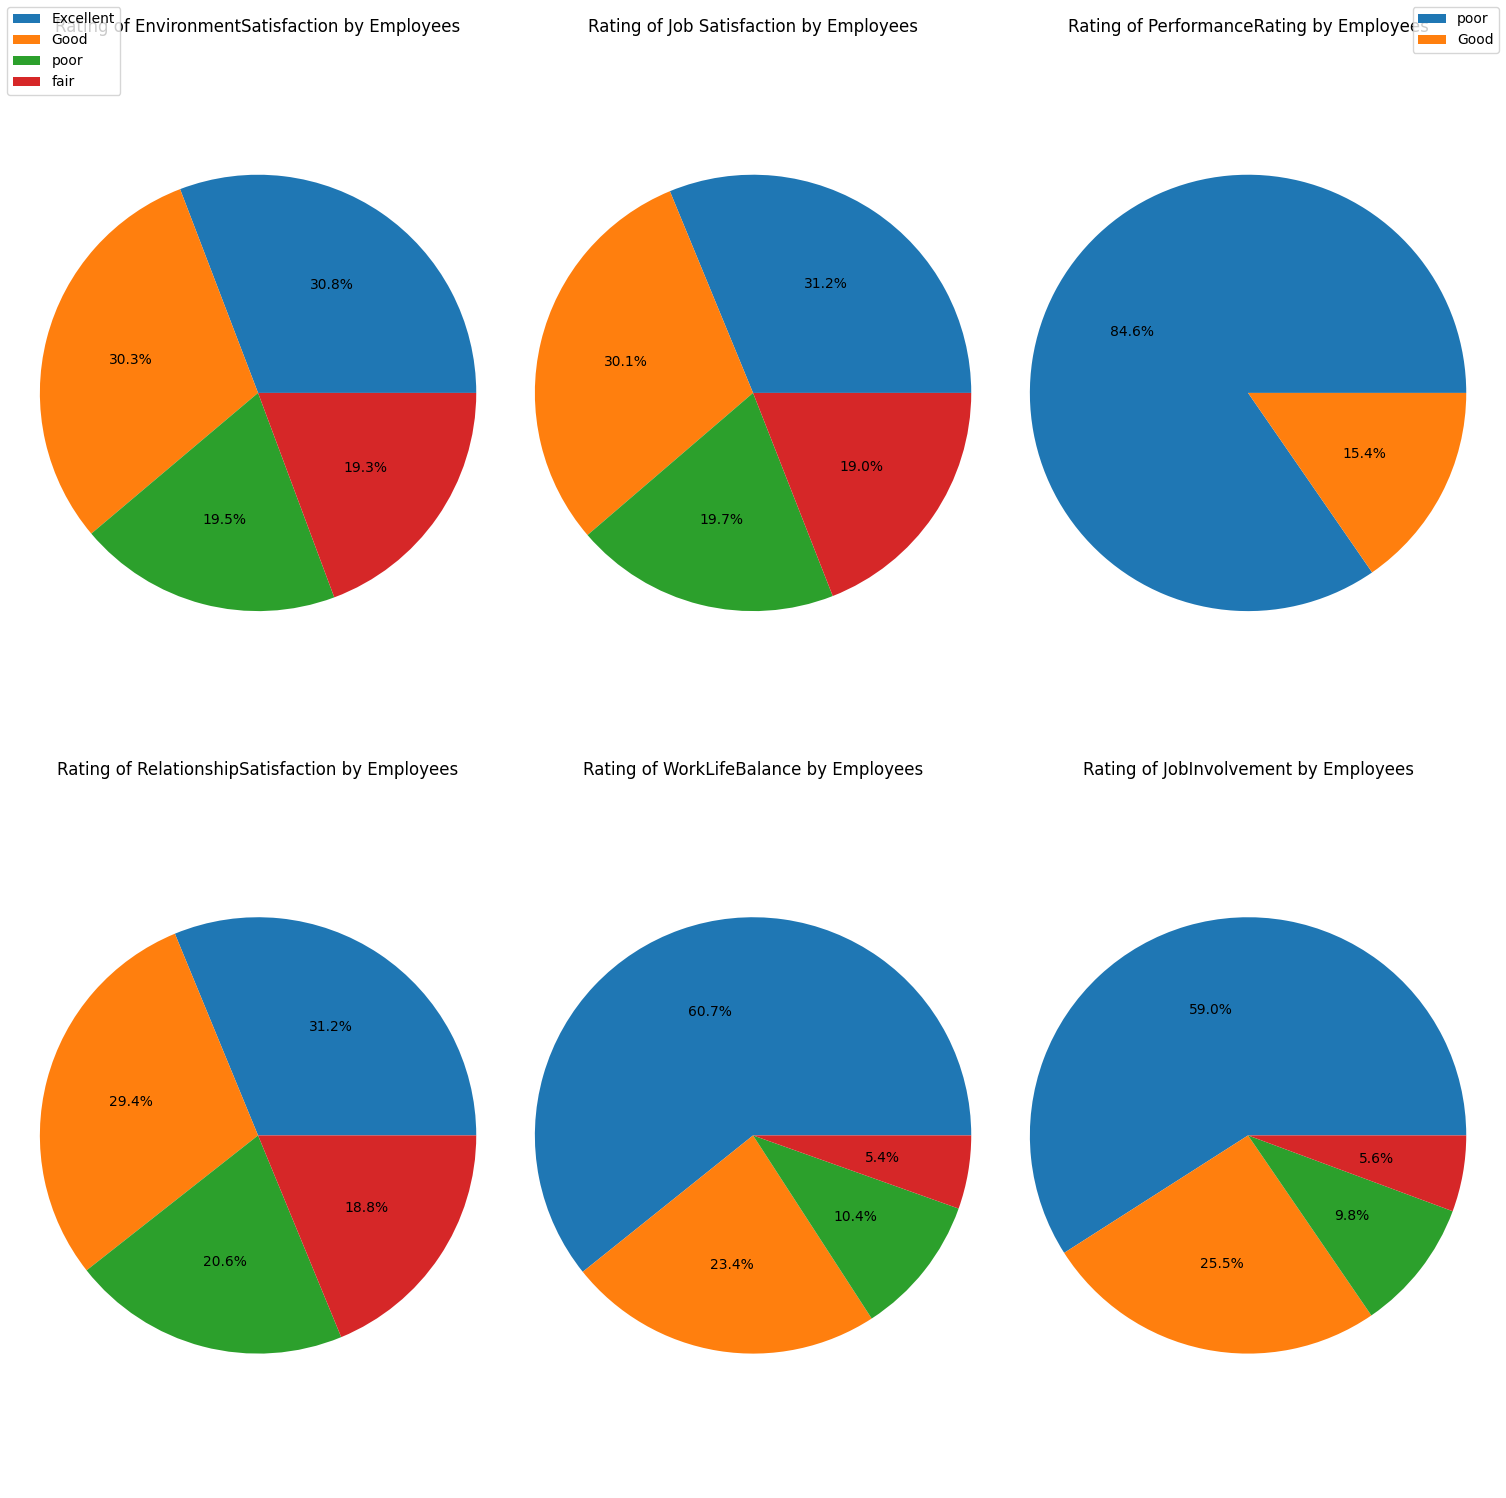

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[0, 2]
ax4 = axes[1, 0]
ax5 = axes[1, 1]
ax6 = axes[1, 2]

ratings['EnvironmentSatisfaction'] = ratings['EnvironmentSatisfaction'].replace({1: 'poor', 2: 'fair', 3: 'Good', 4: 'Excellent'})
ratings['JobSatisfaction'] = ratings['JobSatisfaction'].replace({1: 'poor', 2: 'fair', 3: 'Good', 4: 'Excellent'})
ratings['PerformanceRating'] = ratings['PerformanceRating'].replace({3: 'poor', 4: 'Good'})
ratings['RelationshipSatisfaction'] = ratings['RelationshipSatisfaction'].replace({1: 'poor', 2: 'fair', 3: 'Good', 4: 'Excellent'})
ratings['WorkLifeBalance'] = ratings['WorkLifeBalance'].replace({1: 'poor', 2: 'fair', 3: 'Good', 4: 'Excellent'})
ratings['JobInvolvement '] = ratings['JobInvolvement'].replace({1: 'poor', 2: 'fair', 3: 'Good', 4: 'Excellent'})




rating_counts1 = ratings['EnvironmentSatisfaction'].value_counts()
b1 = rating_counts1.index
ax1.pie(rating_counts1, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title ('Rating of EnvironmentSatisfaction by Employees')




rating_counts2 = ratings['JobSatisfaction'].value_counts()
b2 = rating_counts2.index
ax2.pie(rating_counts2, autopct='%1.1f%%')
ax2.axis('equal')
fig.legend(labels=b2,loc='upper left')
ax2.set_title ('Rating of Job Satisfaction by Employees')


rating_counts3 = ratings['PerformanceRating'].value_counts()
b3 = rating_counts3.index
ax3.pie(rating_counts3, autopct='%1.1f%%')
ax3.axis('equal')
fig.legend(labels=b3,loc='upper right')
ax3.set_title ('Rating of PerformanceRating by Employees')


rating_counts4 = ratings['RelationshipSatisfaction'].value_counts()
b4 = rating_counts4.index
ax4.pie(rating_counts4, autopct='%1.1f%%')
ax4.axis('equal')
ax4.set_title ('Rating of RelationshipSatisfaction by Employees')


rating_counts5 = ratings['WorkLifeBalance'].value_counts()
b5 = rating_counts5.index
ax5.pie(rating_counts5, autopct='%1.1f%%')
ax5.axis('equal')
ax5.set_title ('Rating of WorkLifeBalance by Employees')


rating_counts6 = ratings['JobInvolvement'].value_counts()
b6 = rating_counts6.index
ax6.pie(rating_counts6, autopct='%1.1f%%')
ax6.axis('equal')
ax6.set_title ('Rating of JobInvolvement by Employees')

plt.tight_layout()
plt.show()




The Ratings of the various attributes by employeess where as follows;
1. EnvironmentalSatisfaction: Over 30% people voted for excellent.
2. JobSatisfaction: 31% people gave an excellent rating about JobSatisfaction at the company.
3.PerformanceRating: 84.6% gave an excellent rating and the remainder gave poor.
4. Relationship Satisfaction: 31.2% gave an excellent rating about the Relationship Satisfaction at the company
5. WorkLifeBalance: 60.7% gave an excellent rating for the WorkLifeBalace at the company
6. JobInvolvement: over 59% voted for excellent JobInvolvement at the company

**Data Distribution within the independent variables**

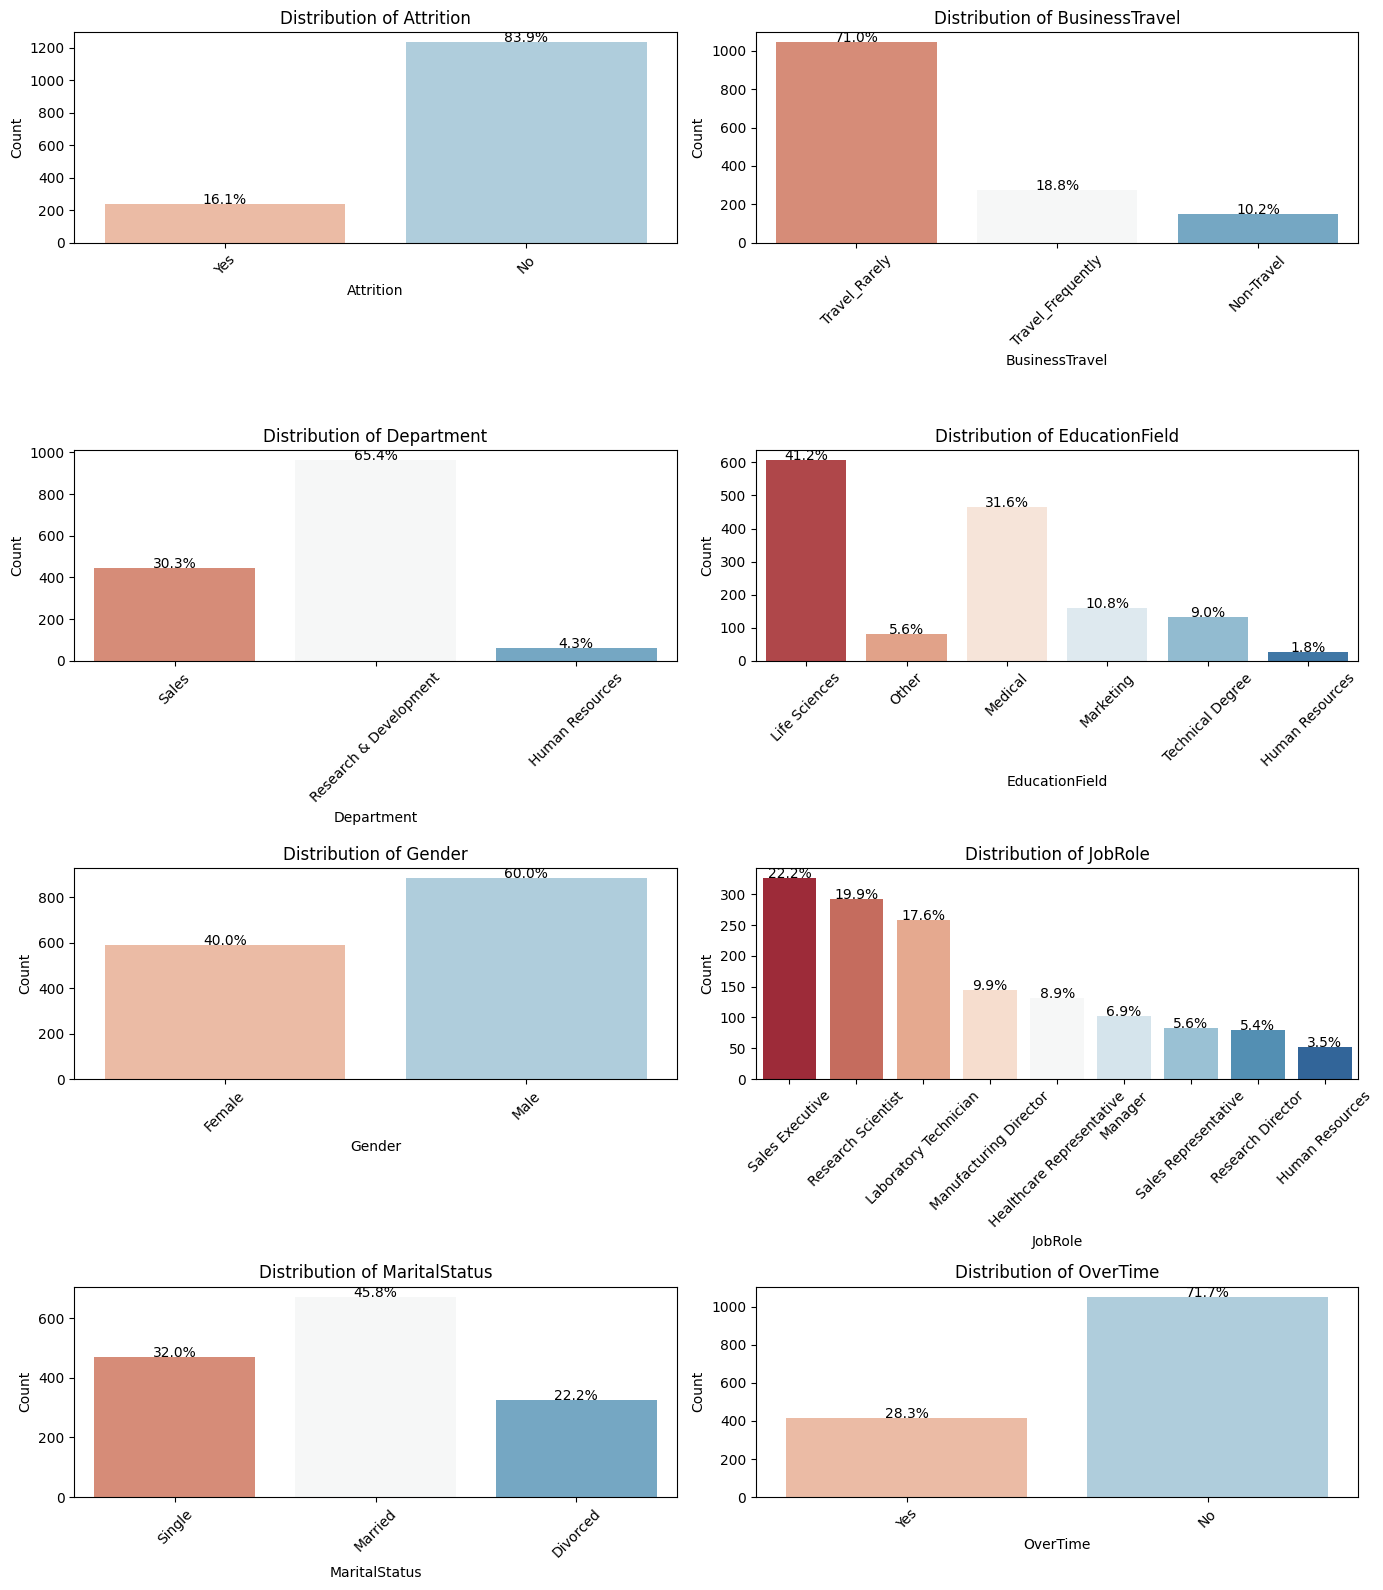

In [17]:
# List of specified nominal variables
nominal_obj = [
    'Attrition', 'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

# Create count plots for each nominal variable
plt.figure(figsize=(14, 16))
for i, var in enumerate(nominal_obj, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=var, data=data, palette="RdBu")
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

# Annotate the bars with counts
for ax in plt.gcf().axes:
    total = len(data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
        #ax.annotate(int(p.get_height()), (x, y - 10), ha='center')

plt.tight_layout()
plt.show()

1. Gender: From the graph we can notice that the majority are male
2. BusinessTravel: We can also notice thst most people in the company rarely travel
3. Department: Futher more, we can notice that Research& Development has the most people in the organisation
4. MaritalStatus: Most of the people in the oragsnisation are married
5. Distribution of Job Role: we can also notice that Sales Executives is the most has the highest number of people in the company

**Cross Analysis between Attrition and Numerical Features**

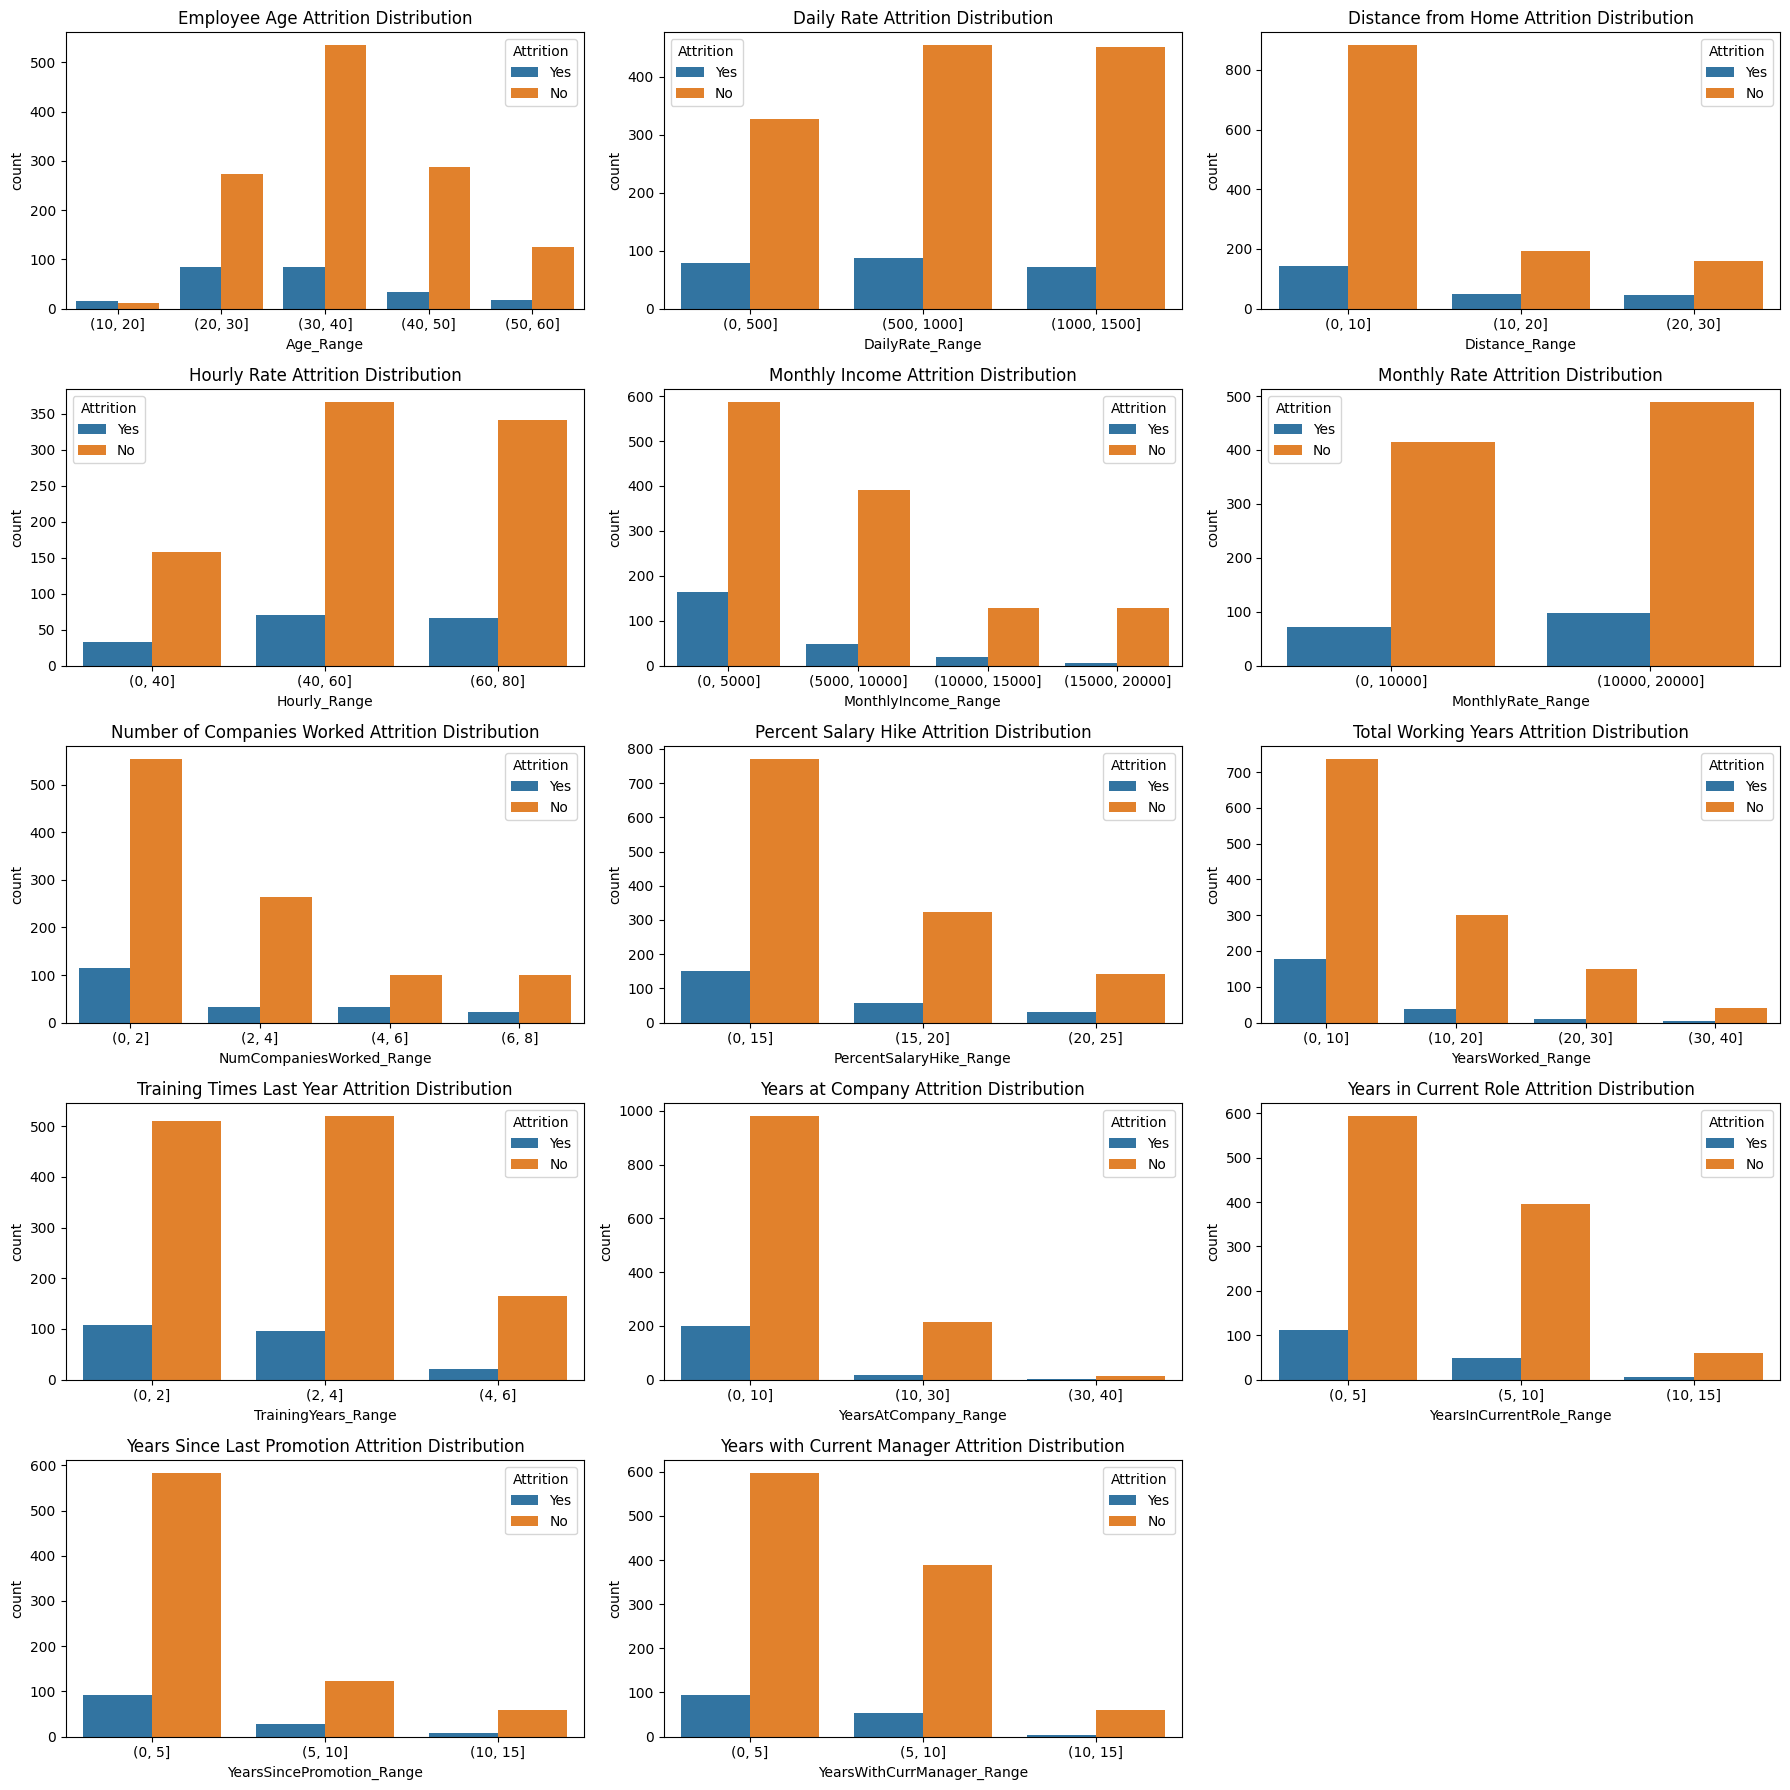

In [18]:
# Define the ranges for variables
new_df = data.copy()

new_df['Age_Range'] = pd.cut(new_df['Age'], [10, 20, 30, 40, 50, 60])
new_df['DailyRate_Range'] = pd.cut(new_df['DailyRate'], [0, 500, 1000, 1500])
new_df['Distance_Range'] = pd.cut(new_df['DistanceFromHome'], [0, 10, 20, 30])
new_df['Hourly_Range'] = pd.cut(new_df['HourlyRate'], [0, 40, 60, 80])
new_df['MonthlyIncome_Range'] = pd.cut(new_df['MonthlyIncome'], [0, 5000, 10000, 15000, 20000])
new_df['MonthlyRate_Range'] = pd.cut(new_df['MonthlyRate'], [0, 10000, 20000])
new_df['NumCompaniesWorked_Range'] = pd.cut(new_df['NumCompaniesWorked'], [0, 2, 4, 6, 8])
new_df['PercentSalaryHike_Range'] = pd.cut(new_df['PercentSalaryHike'], [0, 15, 20, 25])
new_df['YearsWorked_Range'] = pd.cut(new_df['TotalWorkingYears'], [0, 10, 20, 30, 40])
new_df['TrainingYears_Range'] = pd.cut(new_df['TrainingTimesLastYear'], [0, 2, 4, 6])
new_df['YearsAtCompany_Range'] = pd.cut(new_df['YearsAtCompany'], [0, 10, 30, 40])
new_df['YearsInCurrentRole_Range'] = pd.cut(new_df['YearsInCurrentRole'], [0, 5, 10, 15])
new_df['YearsSincePromotion_Range'] = pd.cut(new_df['YearsSinceLastPromotion'], [0, 5, 10, 15])
new_df['YearsWithCurrManager_Range'] = pd.cut(new_df['YearsWithCurrManager'], [0, 5, 10, 15])

# Create subplots
fig, axes = plt.subplots(5, 3, figsize=(18, 18))


# Plot data using countplot
sns.countplot(x='Age_Range', hue='Attrition', data=new_df, ax=axes[0, 0]).set_title('Employee Age Attrition Distribution')
sns.countplot(x='DailyRate_Range', hue='Attrition', data=new_df, ax=axes[0, 1]).set_title('Daily Rate Attrition Distribution')
sns.countplot(x='Distance_Range', hue='Attrition', data=new_df, ax=axes[0, 2]).set_title('Distance from Home Attrition Distribution')
sns.countplot(x='Hourly_Range', hue='Attrition', data=new_df, ax=axes[1, 0]).set_title('Hourly Rate Attrition Distribution')
sns.countplot(x='MonthlyIncome_Range', hue='Attrition', data=new_df, ax=axes[1, 1]).set_title('Monthly Income Attrition Distribution')
sns.countplot(x='MonthlyRate_Range', hue='Attrition', data=new_df, ax=axes[1, 2]).set_title('Monthly Rate Attrition Distribution')
sns.countplot(x='NumCompaniesWorked_Range', hue='Attrition', data=new_df, ax=axes[2, 0]).set_title('Number of Companies Worked Attrition Distribution')
sns.countplot(x='PercentSalaryHike_Range', hue='Attrition', data=new_df, ax=axes[2, 1]).set_title('Percent Salary Hike Attrition Distribution')
sns.countplot(x='YearsWorked_Range', hue='Attrition', data=new_df, ax=axes[2, 2]).set_title('Total Working Years Attrition Distribution')
sns.countplot(x='TrainingYears_Range', hue='Attrition', data=new_df, ax=axes[3, 0]).set_title('Training Times Last Year Attrition Distribution')
sns.countplot(x='YearsAtCompany_Range', hue='Attrition', data=new_df, ax=axes[3, 1]).set_title('Years at Company Attrition Distribution')
sns.countplot(x='YearsInCurrentRole_Range', hue='Attrition', data=new_df, ax=axes[3, 2]).set_title('Years in Current Role Attrition Distribution')
sns.countplot(x='YearsSincePromotion_Range', hue='Attrition', data=new_df, ax=axes[4, 0]).set_title('Years Since Last Promotion Attrition Distribution')
sns.countplot(x='YearsWithCurrManager_Range', hue='Attrition', data=new_df, ax=axes[4, 1]).set_title('Years with Current Manager Attrition Distribution')

fig.delaxes(axes[4, 2])
plt.tight_layout()
plt.show()


1. From the graphs above, we can notice that people in same role for over 10 yeas stay at the company.
2. Similary, we can notice that people who stay over 10 years stay at the company.
3. Further more, people usually leave the company within 0-4 years if theres no promotion.

**Cross Analysis between Attrition and Ratings Features**

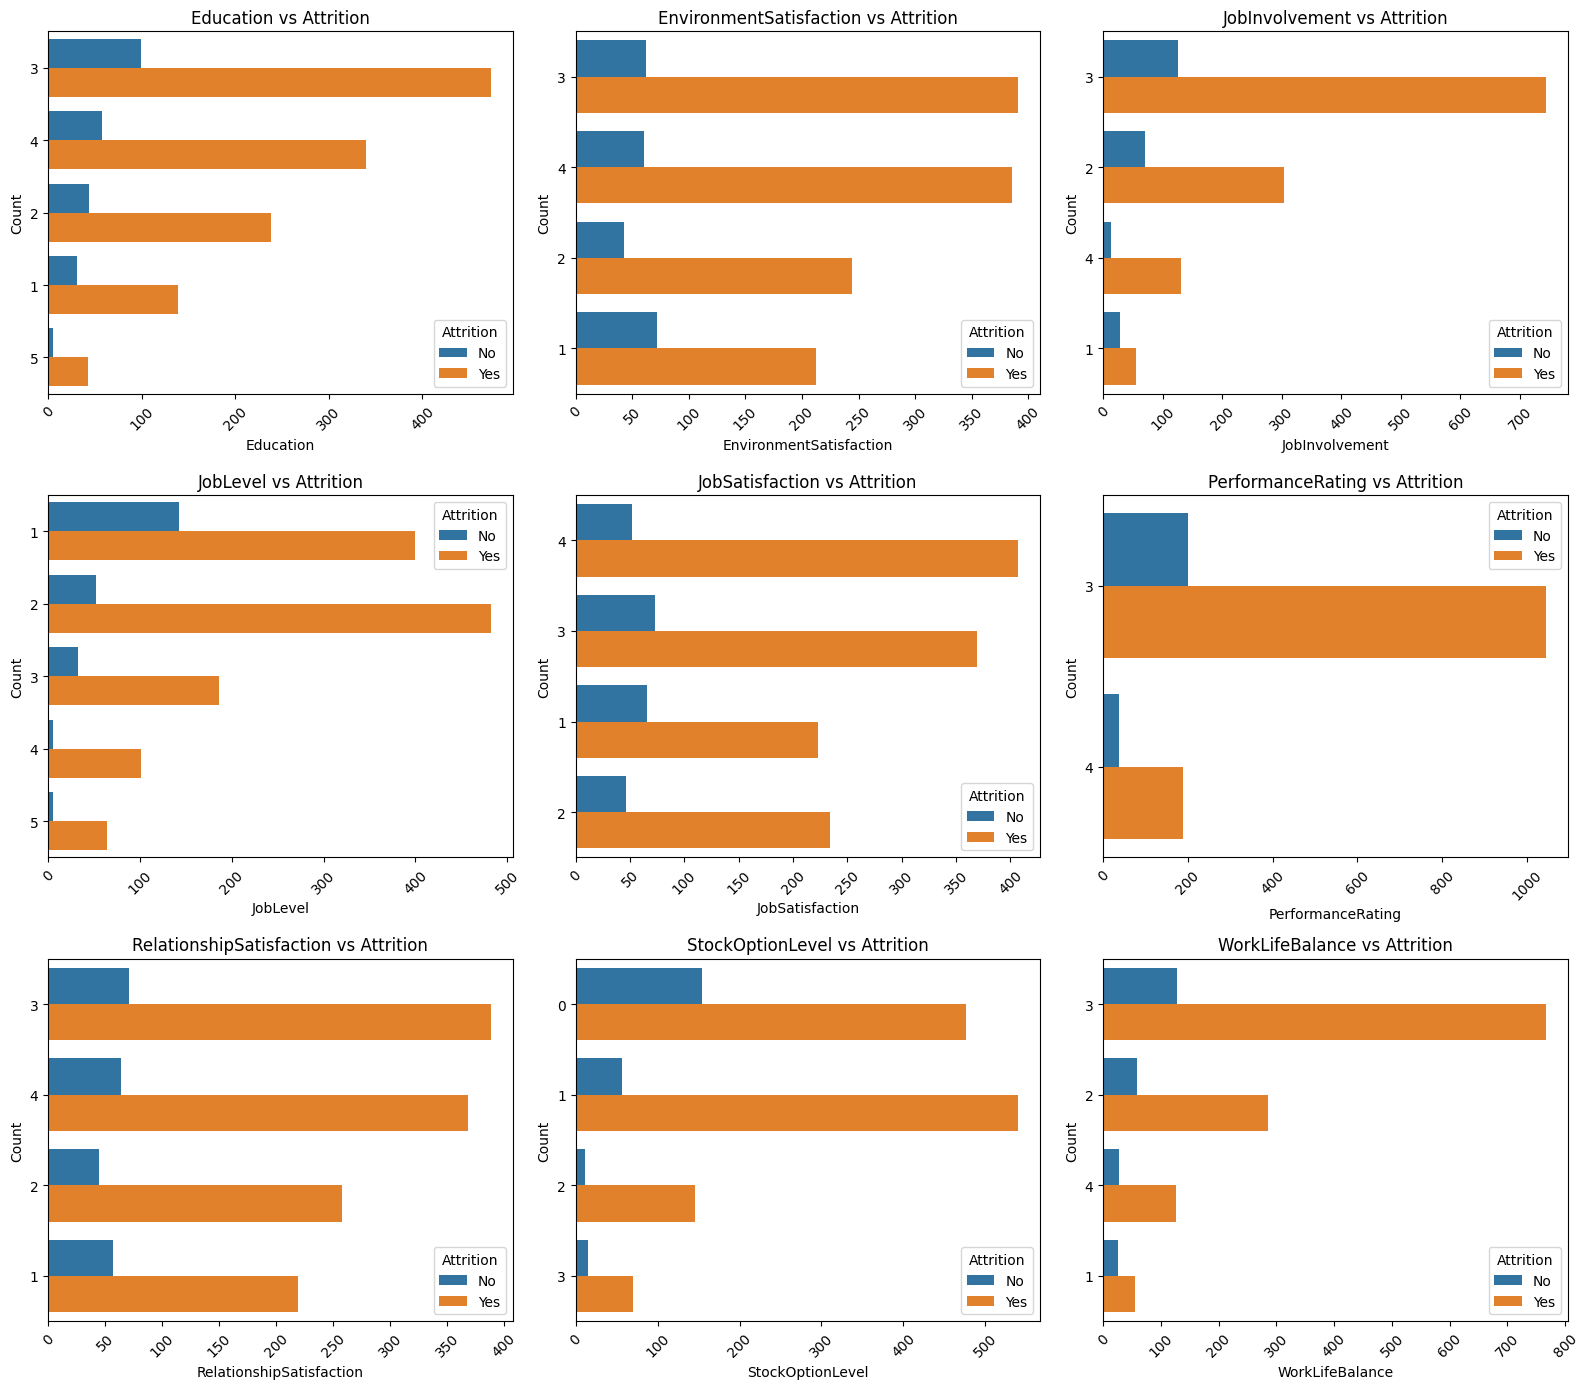

In [19]:
# List of specified ordinal variables
ordinal_vars = [
     'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobLevel', 'JobSatisfaction', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'
]

# Create grouped bar plots for each ordinal variable with respect to Attrition
plt.figure(figsize=(16, 14))
for i, var in enumerate(ordinal_vars, 1):
    if var == 'Attrition':
        continue  # Skip 'Attrition' in the loop

    plt.subplot(3, 3, i)
    sns.countplot(y=var, hue="Attrition", data=data,  order=data[var].value_counts().index)
    plt.title(f"{var} vs Attrition")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

**Cross Analysis between nominal categorical data and Attrition**

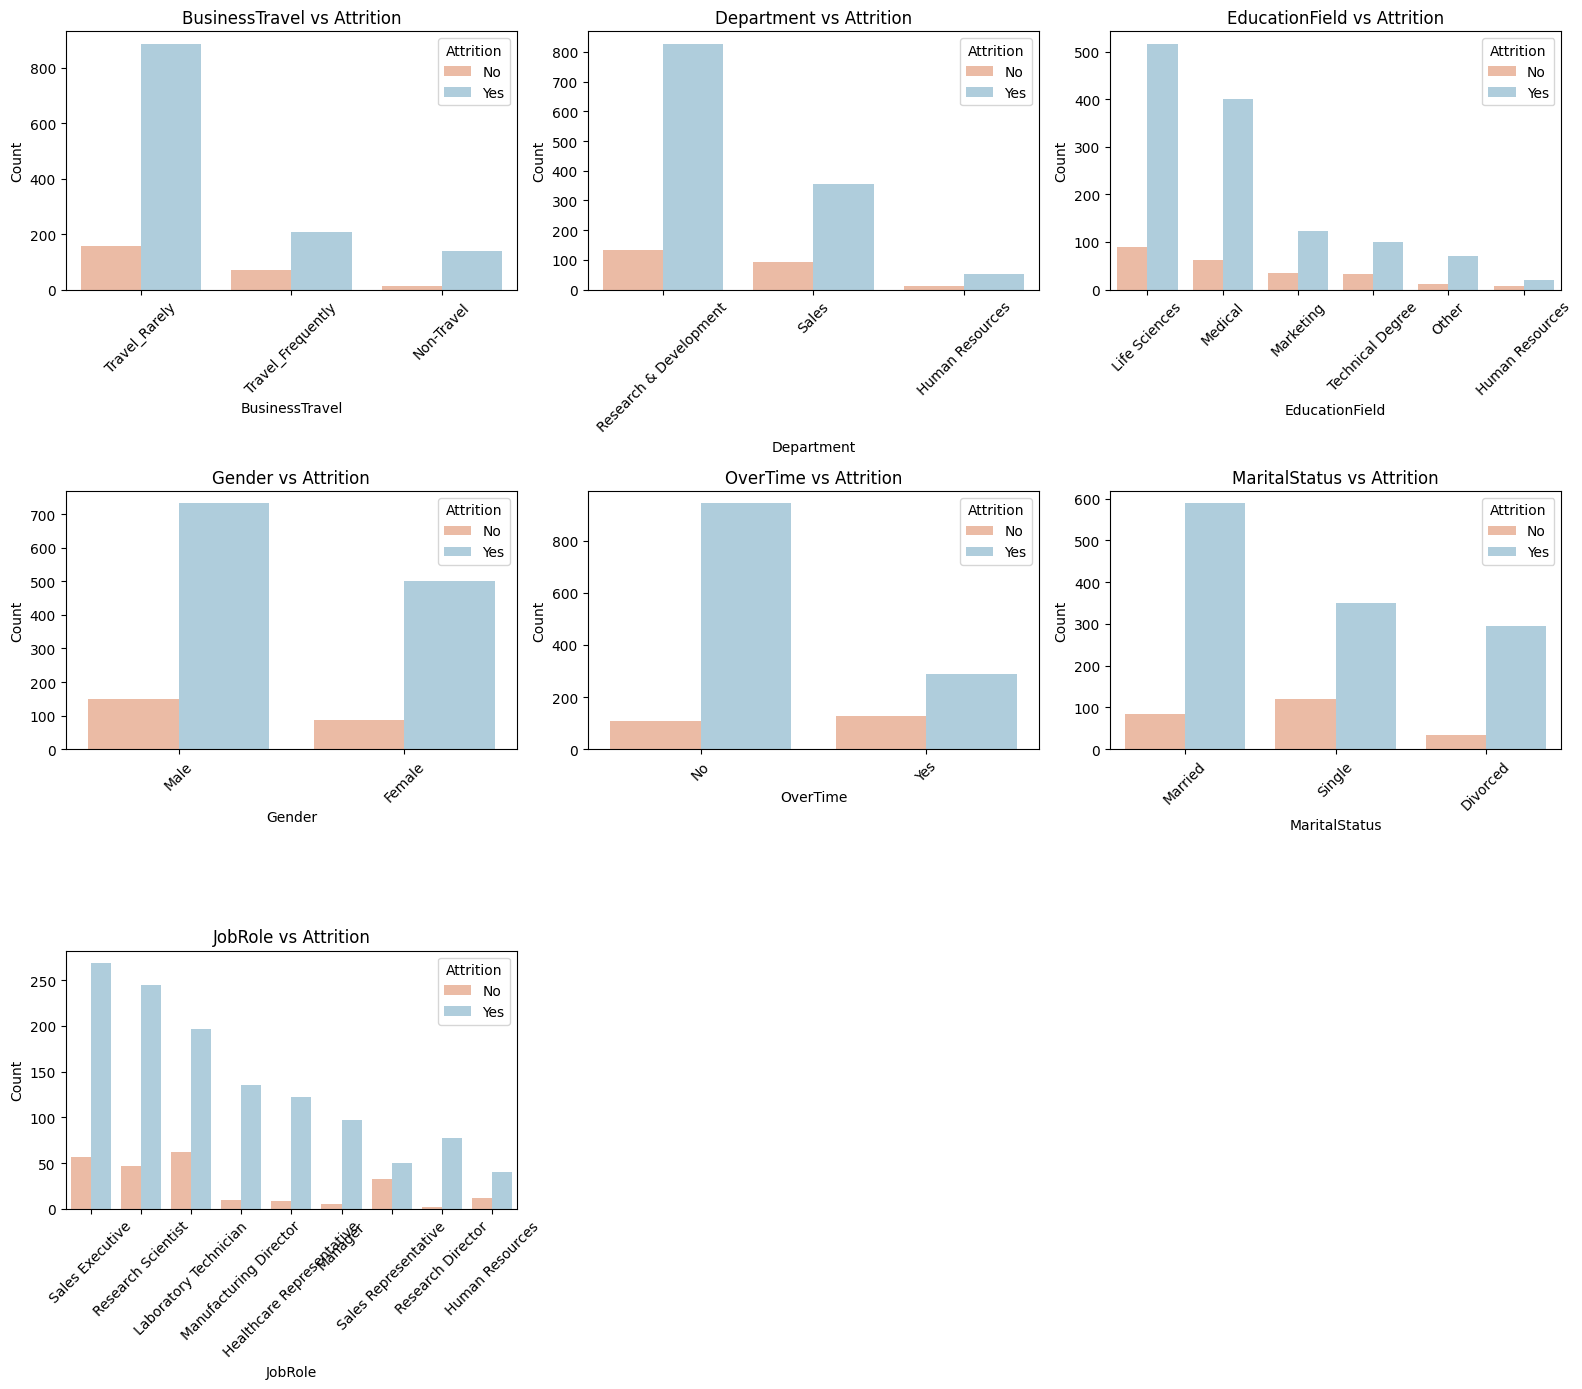

In [20]:
# List of specified nominal variables
nominal_obj = [
    'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'OverTime', 'MaritalStatus','JobRole'
]


# Create grouped bar plots for each ordinal variable with respect to Attrition
plt.figure(figsize=(16, 14))
for i, var in enumerate(nominal_obj, 1):
    if var == 'Attrition':
        continue  # Skip 'Attrition' in the loop

    plt.subplot(3, 3, i)
    sns.countplot(x=var, hue="Attrition", data=data, palette="RdBu", order=data[var].value_counts().index)
    plt.title(f"{var} vs Attrition")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

1. From the graphs above, we can notice that people to travel Rarrely are most likely to leave the company
2. Life Scieces has the highest attrition levels among the other education fields
3. Married people tend to leave the company more compared to other status
4. People associated with the sales executive Job role tend to leave the company more

<ipython-input-21-f1fc035ad35a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap= 'Greens', annot_kws={"size":7})


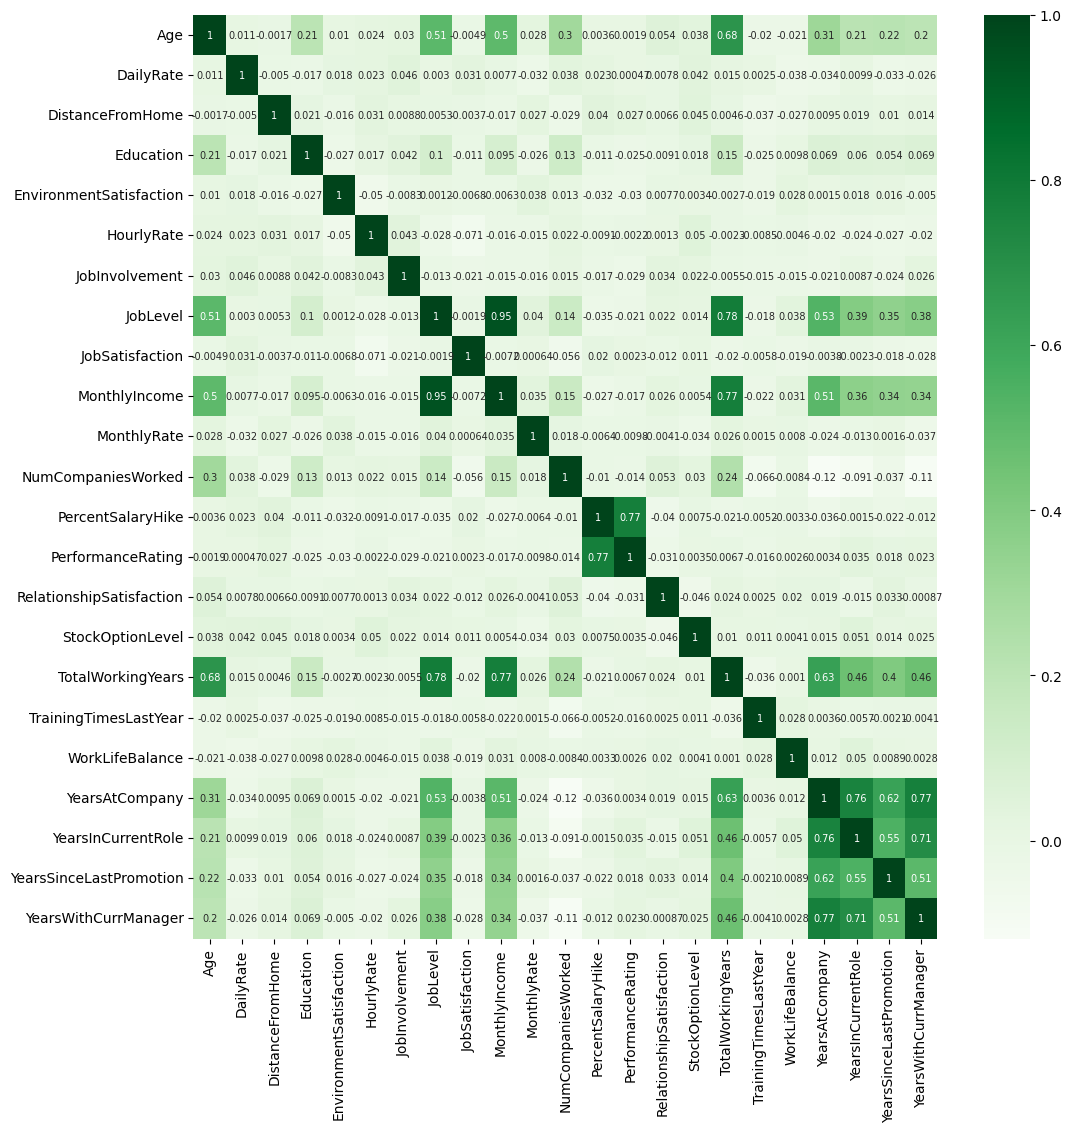

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap= 'Greens', annot_kws={"size":7})
plt.show()

The green zone shows how closely related the time-related features that is years at firm, in present role, since previous promotion, and with current management are to one another.
Additionally, as we anticipated, the total working year also correlates with monthly income.
Most attributes of the rest of the attributes are not correlated.


**Data Encoding**

In encoding , we shall encode the Nominal variables using one hot encoding and the Ordinal variables using Label Encoding

In [22]:
#Creating a list of columns we want to encode
object_columns = ['Attrition','BusinessTravel', 'Gender', 'OverTime']

In [23]:
#importing the label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in object_columns:
    data[column] = le.fit_transform(data[column])

In [24]:
#dummy encoding
dummies = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
data = pd.get_dummies(data=data, columns=dummies)

In [25]:
pd.set_option('display.max_columns',None)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,1,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,2,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,2,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [26]:
#Getting the target feature(attribution) and storing it in a, and the rest of the features in b
a = data.drop(columns=['Attrition'])  # Features
b = data['Attrition']  # Target variable

In [27]:
#Feature selection using chi-squared statistics and ANOVA F-statistic
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Calculate chi-squared statistics for each feature
chi2_scores = chi2(a, b)[0]

# Calculate ANOVA F-statistic and p-values for each feature
f_scores = f_classif(a, b)[0]

# Combine chi-squared and ANOVA scores
combined_scores = chi2_scores + f_scores

feature_scores = pd.DataFrame({'Feature': a.columns, 'Combined_Score': combined_scores})
feature_scores = feature_scores.sort_values(by='Combined_Score', ascending=False)
feature_scores

,Feature,Combined_Score
11,MonthlyIncome,127960.782513
12,MonthlyRate,1196.971469
2,DailyRate,961.307134
19,TotalWorkingYears,274.974109
22,YearsAtCompany,169.101678
14,OverTime,158.501524
23,YearsInCurrentRole,156.360899
25,YearsWithCurrManager,147.383845
0,Age,122.331164
46,MaritalStatus_Single,77.378654


In [28]:
#Dropping some features after selection (where combined_score<0.5)
df = data.drop(columns = ['PerformanceRating', 'JobRole_Research Scientist', 'BusinessTravel'])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [29]:
#checking for the first 2 rows of the dataframe
pd.set_option('display.max_columns',None)
df.head(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [30]:
df.shape

(1470, 45)

In [31]:
#Splitting the data
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target variable

In [32]:
#creating anew list containing the numerical columns
numerical_list = ['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome','MonthlyRate', 'DistanceFromHome', 'NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'  ]

**Building the model**

In [33]:
#splitting  the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=0)

**Feature Scaling**

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_list] = scaler.fit_transform(X_train[numerical_list])
X_test[numerical_list] = scaler.transform(X_test[numerical_list])

**Training the Model**

In [35]:
#Training the model using Decsion Trees Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
#getting accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[212  33]
 [ 33  16]]


0.7755102040816326

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       245
           1       0.33      0.33      0.33        49

    accuracy                           0.78       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.78      0.78      0.78       294



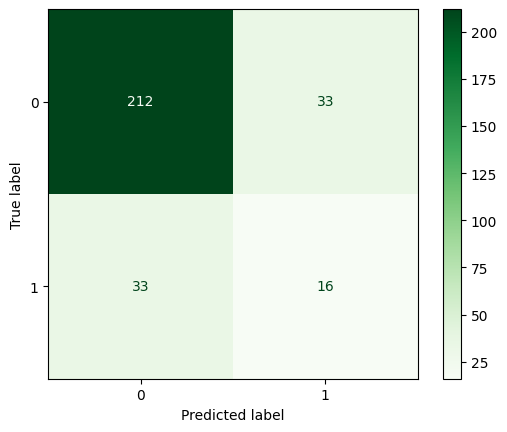

In [38]:
#Printing the classification report and displaying the confusion matrix
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Greens')


From the confusion matrix, we can see that we have 212 true positives and 16 true negatives.

**Dealing with the imbalanced dataset using Smote**

In [39]:
#Before oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


Before OverSampling, counts of label '1': 188
Before OverSampling, counts of label '0': 988 



In [40]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution after resampling
print("Class distribution after resampling:", Counter(y_resampled))

Class distribution after resampling: Counter({1: 1233, 0: 1233})


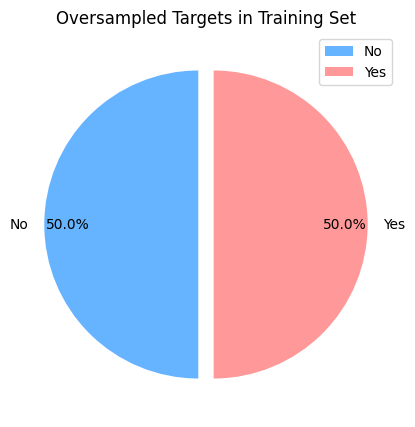

In [41]:
colors = ['#66b3ff', '#ff9999']
explode = (0.05,0.05)
plt.figure(figsize=(5, 5))
plt.pie(pd.Series(y_resampled).value_counts(), colors = colors, labels=['No', 'Yes'],
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
plt.legend()
plt.title("Oversampled Targets in Training Set")
plt.show()

In [42]:
#splitting the resampled data into training and testing sets
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_resampled, y_resampled, test_size= 0.20, random_state=0)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train[numerical_list] = scaler.fit_transform(X1_train[numerical_list])
X1_test[numerical_list] = scaler.transform(X1_test[numerical_list])

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X1_train, y1_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [45]:
y1_pred = classifier2.predict(X1_test)

In [46]:
#getting accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
cm1 = confusion_matrix(y1_test, y1_pred)
print(cm1)
accuracy_score(y1_test, y1_pred)

[[186  45]
 [ 48 215]]


0.8117408906882592

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       231
           1       0.83      0.82      0.82       263

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494



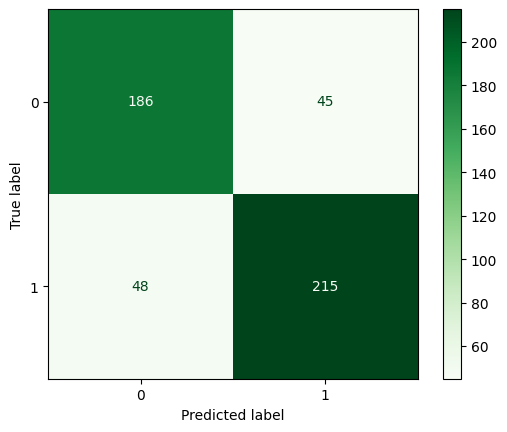

In [47]:
#Printing the classification report and displaying the confusion matrix
print(classification_report(y1_test, y1_pred))
ConfusionMatrixDisplay.from_predictions(y1_test, y1_pred, cmap = 'Greens')

#sns.heatmap(cm, annot=True , cmap='Blues')

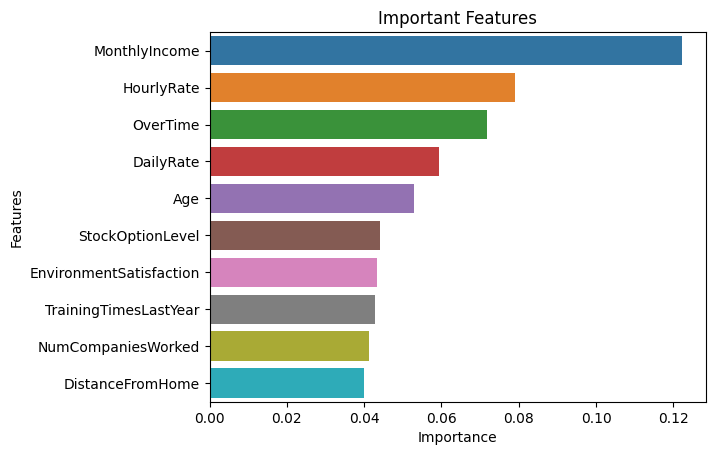

In [48]:
IF1 = pd.DataFrame({"Features": np.array(X.columns), "Importance": classifier.feature_importances_})
IF1 = IF1.sort_values(by=['Importance'], ascending=False)
#plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Features', data=IF1[:10])
plt.title('Important Features')
plt.show()

In [49]:
#Perfroming crossvalidatiom
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier2, X =X1_train , y= y1_train, cv= 10)
print('Accuracy: {:.2f}%' .format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%' .format (accuracies.std()*100))

Accuracy: 84.13%
Standard Deviation: 1.62%


In [50]:
#Finding the best model and parameters using gridsearch
from sklearn.model_selection import GridSearchCV
parameters =[{"criterion": ("gini", "entropy"),
          "splitter": ("best", "random"),
          "max_depth": np.arange(1, 20),
          "min_samples_split": [2, 3, 4],
          "min_samples_leaf": np.arange(1, 20)}]

grid_search = GridSearchCV(estimator= classifier2, param_grid=parameters, scoring = 'accuracy', cv =10)

grid_search.fit(X1_train, y1_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy: {:.2f}%' .format(best_accuracy*100))
print('Best Parameters:', best_parameters)

Best Accuracy: 87.42%
Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'}


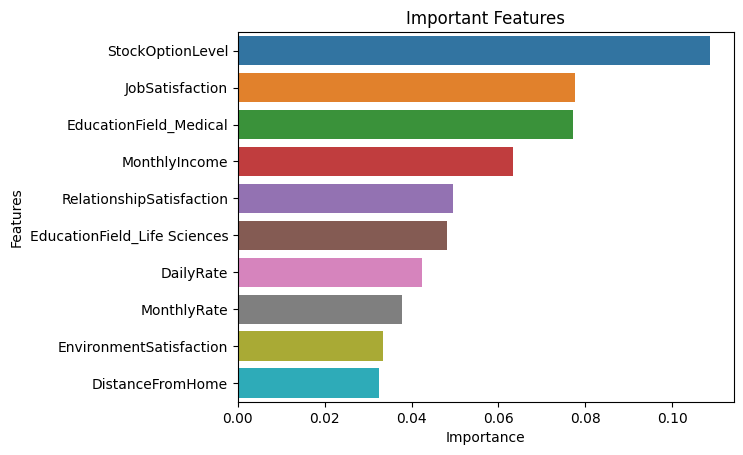

In [51]:
IF2 = pd.DataFrame({"Features": np.array(X.columns), "Importance": classifier2.feature_importances_})
IF2 = IF2.sort_values(by=['Importance'], ascending=False)
#plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Features', data=IF2[:10])
plt.title('Important Features')
plt.show()

**Conclusion**

In our investigation, we discovered that 16% of employees left the organization, with the Research & Development department accounting for more than half of those departures. The majority of employees who left the company evaluated their job satisfaction as good or excellent.The MonthlyIncome, MonthlyRate,and DailyRate were determined to be significant factors in determining whether they left the company.

Based on the feature importances from the Decision tree model, an employee's StockOptionLevel, JobSatisfaction, and EducationField_medical were among the most influential predictors of employee attrition.